In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import cv2

In [2]:
print(tf.__version__)

2.3.0


In [3]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.efficientnet import preprocess_input

In [4]:
import numpy as np
from scipy import signal, misc, ndimage
from skimage import filters, feature, img_as_float
from skimage.io import imread
from skimage.color import rgb2gray, gray2rgb
from PIL import Image, ImageFilter
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
import matplotlib
from skimage.filters import laplace
from skimage import io

In [5]:
# C:\Users\patel\Desktop\Mini_Project\dMini_Projectataset\individual\elbow
training_dir = "C:/Users/patel/Desktop/Mini_Project/dataset/individual/finger/train/"
testing_dir  = "C:/Users/patel/Desktop/Mini_Project/dataset/individual/finger/validation/"


print("DATA IMPORTING FROM THE DIRECTORY...")
training_datagen = ImageDataGenerator(
    preprocessing_function = preprocess_input,
    validation_split=0.2,
#     rescale = 1./255,
#     horizontal_flip = True,
#     vertical_flip = True,
    rotation_range = 15,
    fill_mode = 'nearest'
)


training_gen = training_datagen.flow_from_directory(
    training_dir,
    target_size = (256,256),
    shuffle=True,
    class_mode = 'categorical',
    batch_size = 32,
    subset= 'training'
)

validation_gen = training_datagen.flow_from_directory(
    training_dir,
    target_size = (256,256),
    shuffle = True,
    class_mode = 'categorical',
    batch_size = 16,
    subset = 'validation'
)
print("DATA LOADED")

DATA IMPORTING FROM THE DIRECTORY...
Found 4086 images belonging to 2 classes.
Found 1020 images belonging to 2 classes.
DATA LOADED


In [6]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Input, Dropout, BatchNormalization, MaxPooling2D, Conv2D,Flatten
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping

In [7]:
# #Trial 1

# model = Sequential([
#     Conv2D(64, 7, activation='relu',padding='same',input_shape=[224,224,3]),
#     MaxPooling2D(2),
#     Conv2D(128,3,padding = 'same',activation='relu'),
#     Conv2D(128,3,padding = 'same',activation='relu'),
#     MaxPooling2D(2),
#     Conv2D(256,3,padding = 'same',activation='relu'),
#     Conv2D(256,3,padding = 'same',activation='relu'),
#     MaxPooling2D(2),
#     Flatten(),
#     Dense(128,activation='relu'),
#     Dropout(0.3),
#     Dense(64,activation='relu'),
#     Dropout(0.25),
#     Dense(2,activation='softmax')
# ])

In [8]:
#trial - 2 - EffNetB0
from tensorflow.keras.applications import EfficientNetB0

base_model = EfficientNetB0(
    input_shape=(256,256,3),
    include_top = False,
    weights = 'imagenet'
)

for layer in base_model.layers[:-22]:
    layer.trainable = False

x = Flatten()(base_model.output)


x = Dropout(0.3)(x)
x = Dense(32,activation = 'relu')(x)
x = Dropout(0.25)(x)
x = Dense(16,activation = 'relu')(x)
x = Dense(2, activation = 'softmax')(x)

model = tf.keras.Model(base_model.input, x)

In [9]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 256, 256, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, 256, 256, 3)  7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 257, 257, 3)  0           normalization[0][0]              
_______________________________________________________________________________________

In [10]:
my_callback = EarlyStopping(
    patience=5,
    monitor = 'val_loss',
    min_delta = 0.0005
)
adam = Adam(learning_rate=0.001)

model.compile(optimizer=Adam(),loss='categorical_crossentropy',metrics=['acc'])

history = model.fit(
    training_gen,
    epochs = 50,
    validation_data= validation_gen,
)

Epoch 1/50
128/128 [==============================] - 81s 630ms/step - loss: 0.7164 - acc: 0.6248 - val_loss: 0.5824 - val_acc: 0.6882
Epoch 2/50
128/128 [==============================] - 67s 523ms/step - loss: 0.5840 - acc: 0.6889 - val_loss: 0.5422 - val_acc: 0.7225
Epoch 3/50
128/128 [==============================] - 67s 522ms/step - loss: 0.5677 - acc: 0.6933 - val_loss: 0.5077 - val_acc: 0.7304
Epoch 4/50
128/128 [==============================] - 67s 523ms/step - loss: 0.5527 - acc: 0.7230 - val_loss: 0.5113 - val_acc: 0.7539
Epoch 5/50
128/128 [==============================] - 67s 521ms/step - loss: 0.4989 - acc: 0.7264 - val_loss: 0.4979 - val_acc: 0.7294
Epoch 6/50
128/128 [==============================] - 67s 526ms/step - loss: 0.4923 - acc: 0.7364 - val_loss: 0.5735 - val_acc: 0.7510
Epoch 7/50
128/128 [==============================] - 67s 522ms/step - loss: 0.5039 - acc: 0.7301 - val_loss: 0.5075 - val_acc: 0.7294
Epoch 8/50
128/128 [==============================] - 6

In [11]:
import matplotlib.pyplot as plt

        loss       acc  val_loss   val_acc
0   0.716365  0.624816  0.582437  0.688235
1   0.584040  0.688938  0.542196  0.722549
2   0.567709  0.693343  0.507717  0.730392
3   0.552706  0.722956  0.511328  0.753922
4   0.498902  0.726383  0.497871  0.729412
5   0.492342  0.736417  0.573491  0.750980
6   0.503910  0.730054  0.507485  0.729412
7   0.476428  0.738375  0.698440  0.704902
8   0.457133  0.758199  0.482830  0.769608
9   0.438066  0.763093  0.482016  0.763726
10  0.414600  0.785854  0.578267  0.702941
11  0.438774  0.779246  0.523605  0.746078
12  0.413910  0.779491  0.518255  0.720588
13  0.419516  0.783651  0.729392  0.760784
14  0.402335  0.790015  0.488078  0.753922
15  0.405385  0.790749  0.895355  0.752941
16  0.383293  0.798825  0.640625  0.762745
17  0.397912  0.808860  0.581422  0.757843
18  0.385972  0.804209  0.537116  0.753922
19  0.366394  0.819628  0.729423  0.760784
20  0.358535  0.829173  0.609482  0.714706
21  0.330923  0.846549  0.846953  0.758824
22  0.30997

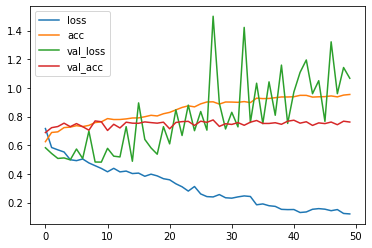

In [12]:
history_df = pd.DataFrame(history.history)
print(history_df)
history_df.plot()
plt.show()

In [13]:
import numpy as np 
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import os
import shutil
from tensorflow.keras.applications.efficientnet import preprocess_input

In [14]:
def testing(path):
    files = os.listdir(path)
    df = pd.DataFrame(columns=['patient_id','number_of_images' ,'actual_diagnosis','prediction_negative_array','prediction_positive_array','predicted_diagnosis'])
    for f1 in files:
        file_p_n = os.listdir(path+'/'+f1)
        for f2 in file_p_n:
            p_n_str = f2.split('_')[1]
            img_files = os.listdir(path+'/'+f1+'/'+f2)
            n_imgs = len(img_files)
            pos_array = []
            neg_array = []
            for f3 in img_files:
                img = image.load_img(path+'/'+f1+'/'+f2+'/'+f3,target_size=(256,256))
                img = image.img_to_array(img)
                img = preprocess_input(img)
                img = np.expand_dims(img, axis = 0)
                prediction = model.predict(img)
#                 print(prediction)
                pos_array.append(prediction[0][1])
                neg_array.append(prediction[0][0])
            final_n = np.mean(neg_array)
            final_p = np.mean(pos_array)
            if final_p >= final_n:
                result = 'positive'
            else:
                result = 'negative'
            df = df.append({'patient_id':f1,'number_of_images':n_imgs,'actual_diagnosis':p_n_str,'prediction_negative_array':neg_array,'prediction_positive_array':pos_array,'predicted_diagnosis':result},ignore_index=True)
    return df

In [ ]:
finger_testing = testing("C:/Users/patel/Desktop/Mini_Project/MURA-v1.1/MURA-v1.1/valid/XR_FINGER")

In [16]:
# df1 = pd.read_csv('elbow_eff_83.csv')
df1 = hand_testing
cnt = 0
for i in range(148):
    if df1.iloc[i]["actual_diagnosis"] == df1.iloc[i]['predicted_diagnosis']:
        cnt+=1

print("Accuracy :",(cnt/158)*100)

Accuracy : 63.92405063291139


In [17]:
tp, tn, fp, fn = 0, 0, 0, 0

for i in range(153):
    if (df1.iloc[i]["actual_diagnosis"] == "positive") and  (df1.iloc[i]['predicted_diagnosis']=="positive"):
        tp += 1
    elif (df1.iloc[i]["actual_diagnosis"] == "positive") and  (df1.iloc[i]['predicted_diagnosis']=="negative"):
        fn += 1
    elif (df1.iloc[i]["actual_diagnosis"] == "negative") and  (df1.iloc[i]['predicted_diagnosis']=="positive"):
        fp += 1
    else:
        tn +=1

In [18]:
print("True Positive :", tp)
print("True Negative :", tn)
print("False Positive :", fp)
print("False Negative :", fn)


True Positive : 22
True Negative : 83
False Positive : 4
False Negative : 44


In [19]:
model.save_weights('hand_model.h5')